In [3]:
#install.packages("sjmisc")
#install.packages("fdth", quiet=TRUE)

library(readxl)
library(sjmisc)
library(fdth)
library(dplyr)

In [4]:
options(warn=-1)

In [5]:
dataset <- read_excel("./lapaz_troncales_limpio.xlsx")
dim(dataset)

[1] 70641    17

In [6]:
str(dataset)

Classes 'tbl_df', 'tbl' and 'data.frame':	70641 obs. of  17 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : chr  "MAÑANA" "MAÑANA" "MAÑANA" "MAÑANA" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" ...
 $ Documento         : num  1.14e+08 1.14e+08 1.14e+08 1.14e+08 1.14e+08 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "CIENCIAS NATURALES" "CIENCIAS SOCIALES" "EDUCACIÓN FÍSICA" "LENGUA" ...
 $ NivelEnseñanza    : chr  "PRIMARIO" "PRIMARIO" "PRIMARIO" "PRIMARIO" ...
 $ Nivel             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Modalidad         : chr  "Primaria" "Primaria" "Primaria" "Primaria" ...
 $ ModEnseñanza      : chr  "Comun" "Comun" "Comun" "Comun" ...
 $ AñoCursado        : num  3 3 3 3 3 5 5 5 5 5 ...
 $ NotasPrimerT      : num  8 8 9 9 10 8 8 7 8 8 ...
 $ NotasSegund

In [7]:
ftable(dataset$AñoCursado)

     1     2     3     4     5     6     7
                                          
 11254 10189 10940 14132 12882 11035   131

In [8]:
ftable(dataset$NivelEnseñanza)

 EGB 3 PRIMARIO SECUNDARIO
                          
  2653    26792      41196

## Eliminamos la columna de Nivel, ya que NivelEnseñanza nos brinda más información que la anterior y están relacionadas.
## También eliminamos la columna de año ya que todos nuestros datos son del 2022, sería redundante dejarla.

In [9]:
head(dataset)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,año,asignatura,NivelEnseñanza,Nivel,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,2022,CIENCIAS NATURALES,PRIMARIO,2,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,2022,CIENCIAS SOCIALES,PRIMARIO,2,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,2022,EDUCACIÓN FÍSICA,PRIMARIO,2,Primaria,Comun,3,9,9,9,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,2022,LENGUA,PRIMARIO,2,Primaria,Comun,3,9,8,10,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,2022,MATEMÁTICA,PRIMARIO,2,Primaria,Comun,3,10,9,9,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,14082908,2022,CIENCIAS NATURALES,PRIMARIO,2,Primaria,Comun,5,8,8,8,8.000000,APROBADO


In [10]:
names(dataset)

[1] "CUE"                "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "año"               
 [7] "asignatura"         "NivelEnseñanza"     "Nivel"             
[10] "Modalidad"          "ModEnseñanza"       "AñoCursado"        
[13] "NotasPrimerT"       "NotasSegundoT"      "NotasTercerT"      
[16] "Promedio"           "CondicionFinal"

In [11]:
dim(dataset)

[1] 70641    17

In [12]:
  #<-  filter(dataset, AñoCursado == "1" & asignatura == "MATEMÁTICA")

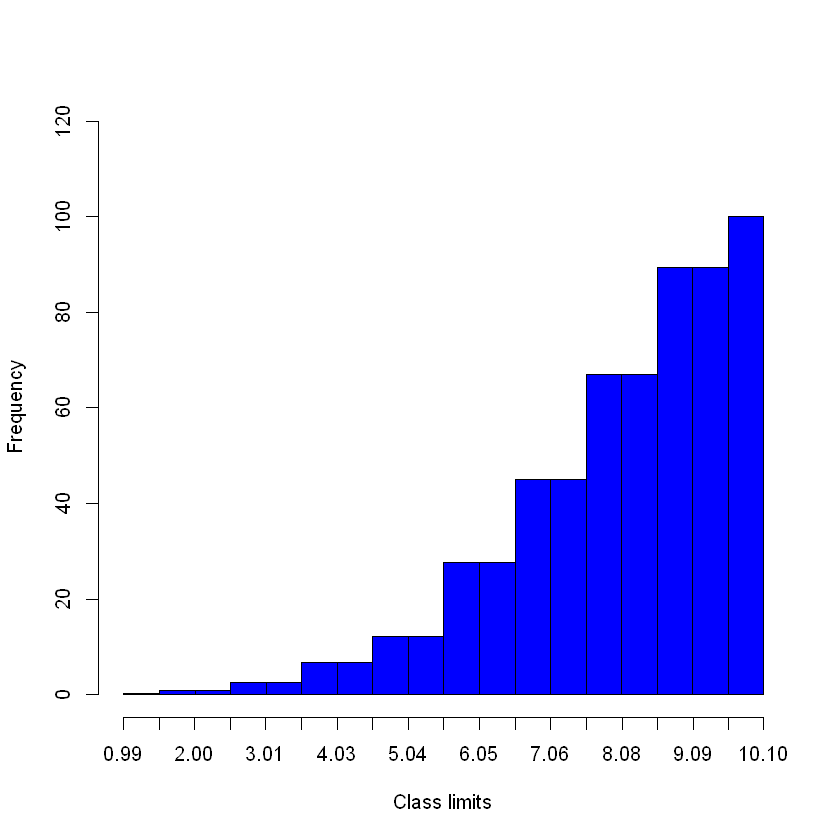

In [13]:
histo_mat_primerT <- fdt(dataset$NotasPrimerT,breaks="Sturges",na.rm=TRUE)
plot(histo_mat_primerT, type="cfph", col="blue")

In [ ]:
ftable(dataset$Modalidad)

In [ ]:
sectores<-filter(dataset, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Primaria")

In [ ]:
p <- table(sectores$AñoCursado)

In [ ]:
library(ggplot2)
pie_commute <- round(100 * table(sectores$AñoCursado) / length(sectores$AñoCursado))
pie_commute
porc <- c(pie_commute)
frec<- c(table(sectores$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)

In [ ]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de 2022 en
            Entre Ríos por Año de Cursado")

In [ ]:
sectores_secu<-filter(dataset, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6" | AñoCursado == "7") & Modalidad == "Secundaria")

In [ ]:

pie <- round(100 * table(sectores_secu$AñoCursado) / length(sectores_secu$AñoCursado))
pie
porc <- c(pie)
frec<- c(table(sectores_secu$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)

In [ ]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de 2022 en
            Entre Ríos por Año de Cursado")

In [ ]:
primaria_Mat_1<-filter(dataset, AñoCursado == "1" & asignatura=="MATEMÁTICA" & Modalidad == "Primaria")
boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Matemática",horizontal = TRUE)


boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

In [ ]:
primaria_len_1<-filter(dataset, AñoCursado == "1" & asignatura=="LENGUA" & Modalidad == "Primaria")
boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Lengua",horizontal = TRUE)


boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

## Boxplot secu



In [ ]:
secundaria_Mat_1<-filter(dataset, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")
boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Matemática - Secundaria",horizontal = TRUE)


boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

In [ ]:
secundaria_len_1<-filter(dataset, AñoCursado == "1" & asignatura=="LENGUA Y LITERATURA" & Modalidad == "Secundaria")
boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Lengua",horizontal = TRUE)


boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

In [ ]:
#Comparación bivariada usando Histogramas Superpuestos

x <- filter(secundaria_Mat_1,EsPrivada==TRUE)$Promedio # Primer grupo
y <- filter(secundaria_Mat_1,EsPrivada==FALSE)$Promedio
hist(x, col="paleturquoise3",border="royalblue",breaks = "Sturges", ylim = c(0, 200),
     density=20,angle=70, xlab="notas", ylab="frecuencia absoluta", main="Histograma frecuencias relativas")
hist(y, add = TRUE, col = rgb(1, 1, 0, alpha = 0.5))

mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)   
abline(v = mean_x, col = 'blue')
abline(v = med_x, col = 'red')
abline(v = mean_y, col = 'black')
abline(v = med_y, col = 'green')

In [ ]:
g2 <- ggplot(secundaria_Mat_1, aes(factor(EsPrivada), Promedio))
g2 + geom_boxplot(aes(fill = factor(EsPrivada)))

In [ ]:
#diagrama de dispersión
#deben tener misma dimension
rm(df)
dim(dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada"))
dim(dplyr::select(filter(dataset,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"))
df<- dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(dataset,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"),by="Documento")
df<-rename(df,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y,EsPrivada=EsPrivada.x)
head(df)
plot(df$Prom_Mat, df$Prom_Bio)

In [ ]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio))+geom_point(aes(colour=EsPrivada)
)+xlab("Longitud")+ylab("ancho")

In [ ]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio, color = EsPrivada))+geom_point()+ 
       geom_smooth(method = "lm")

In [ ]:
dataM <- na.omit(data.frame(df$Prom_Mat, df$Prom_Bio)) 
dataM<-rename(dataM,Prom_Mat=df.Prom_Mat, Prom_Bio=df.Prom_Bio)
var(dataM)

In [ ]:
library("PerformanceAnalytics")
chart.Correlation(dataM, histogram = TRUE, method = "pearson")

In [ ]:
#menos de 50 datos
shapiro.test(dataM$Prom_Mat)

In [ ]:
#conda install -c conda-forge r-nortest
#mas de 50 datos
library(nortest)
lillie.test(x = dataM$Prom_Mat)

In [ ]:
per <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "pearson")
ken <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "kendall")
spe <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")

data <- data.frame(name=c("pearson","kendall","spearman") , value=c(per,ken,spe))

data

In [ ]:
library(corrplot)
corrplot.mixed(cor(dataM, method = "spearman"),addshade="all")

In [ ]:
df2<-dplyr::select(secundaria_len_1,"Documento","Promedio","EsPrivada")

df<- df %>% inner_join(df2,by="Documento")

In [ ]:

dataN <-rename(df,Prom_Len=Promedio)
dataN <- na.omit(dataN) 
dataN <-dplyr::select(dataN,Prom_Mat,Prom_Bio,Prom_Len)
dim(dataN)
head(dataN)

In [ ]:
library(ppcor)
pcor(dataM, method = c("spearman"))

In [ ]:
pcor(dataN, method = c("pearson"))

In [ ]:
ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))
pcor1<-ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))

In [ ]:
library("pwr")
pwr.r.test(n = length(row.names(dataN)), r = pcor1, sig.level = .05, power = NULL)
